In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data - import the necessary libraries (e.g., Pandas) 
# to read your data from a file (e.g., CSV) or a database.

df = pd.read_csv(r"C:\Users\Anjel69\Documents\4th Year Files lez go\ITD105 BIG DATA ANALYTICS\video games\XboxOne_GameSales.csv", encoding='latin1')


In [2]:
# 2. Basic Data Exploration - Check the first few rows of the dataset 
# to get an initial sense of the data's structure.

df.head()


,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


In [3]:
# 3. Data Summary - Generate descriptive statistics for the data, including mean, median, 
# standard deviation, and quartiles, to understand the central tendency and spread of the data.

df.describe()


,Pos,Year,North America,Europe,Japan,Rest of World,Global
count,613.000000,505.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,307.000000,2015.821782,0.265628,0.132447,0.000832,0.039951,0.438874
std,177.102136,1.382975,0.594940,0.335311,0.004216,0.089343,0.983147
min,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,307.000000,2016.000000,0.050000,0.000000,0.000000,0.010000,0.060000
75%,460.000000,2017.000000,0.240000,0.100000,0.000000,0.030000,0.380000
max,613.000000,2020.000000,4.700000,3.250000,0.040000,0.760000,8.720000


In [4]:
#4. Data Information - check the data types of each column, 
# the number of non-null values, and memory usage.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pos            613 non-null    int64  
 1   Game           613 non-null    object 
 2   Year           505 non-null    float64
 3   Genre          613 non-null    object 
 4   Publisher      505 non-null    object 
 5   North America  613 non-null    float64
 6   Europe         613 non-null    float64
 7   Japan          613 non-null    float64
 8   Rest of World  613 non-null    float64
 9   Global         613 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 48.0+ KB


In [7]:
# 5. Handling Missing Data - identify and handle missing values using techniques 
# like imputation or removal.

missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

df = df.fillna(df.mean())


Missing Values:
Pos              0
Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64


C:\Users\Anjel69\AppData\Local\Temp\ipykernel_35784\3043725896.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [6]:
# 6. Feature Engineering (if needed) - is the process of creating new features or 
# modifying existing ones to improve the performance of machine learning 

# Fill missing values in 'Year' column with the mean value
mean_year = round(df['Year'].mean())
df['Year'].fillna(mean_year, inplace=True)

# Fill missing values in 'Publisher' column with the most common value (mode)
mode_publisher = df['Publisher'].mode()[0]
df['Publisher'].fillna(mode_publisher, inplace=True)


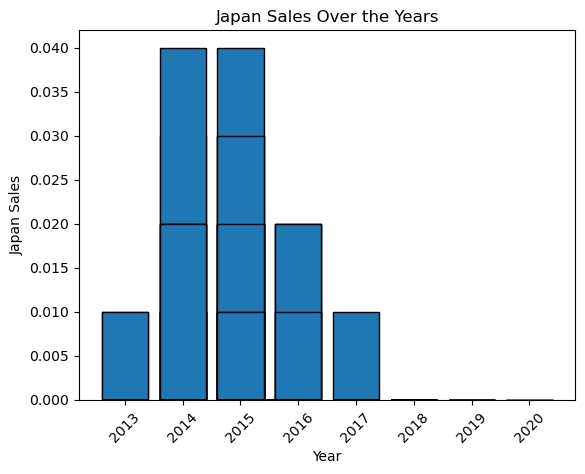

In [8]:
# 7. Data Visualization - Create visualizations to explore data distributions, relationships, and patterns. 
#Use libraries like Matplotlib and Seaborn.

#a. Univariate plots focus on a single variable or feature at a time. 
#They are used to visualize the distribution and characteristics of individual variables in isolation.

#Histogram 

filtered_df = df.dropna(subset=['Year', 'Japan'])
plt.bar(filtered_df['Year'], filtered_df['Japan'], edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Japan Sales')
plt.title('Japan Sales Over the Years')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


C:\Users\Anjel69\AppData\Local\Temp\ipykernel_35784\594007486.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_df['Rest of World'], shade=True, color='skyblue')  # Create the density plot


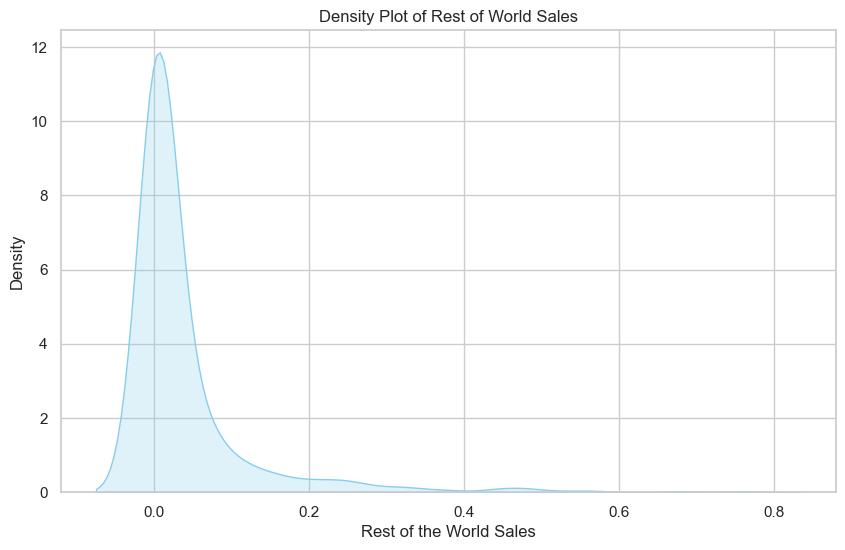

In [9]:
# Density Plots
filtered_df = df.dropna(subset=['Rest of World'])

sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.kdeplot(filtered_df['Rest of World'], shade=True, color='skyblue')  # Create the density plot
plt.xlabel('Rest of the World Sales')  # Label for the x-axis
plt.ylabel('Density')  # Label for the y-axis
plt.title('Density Plot of Rest of World Sales')  # Title of the plot
plt.show()

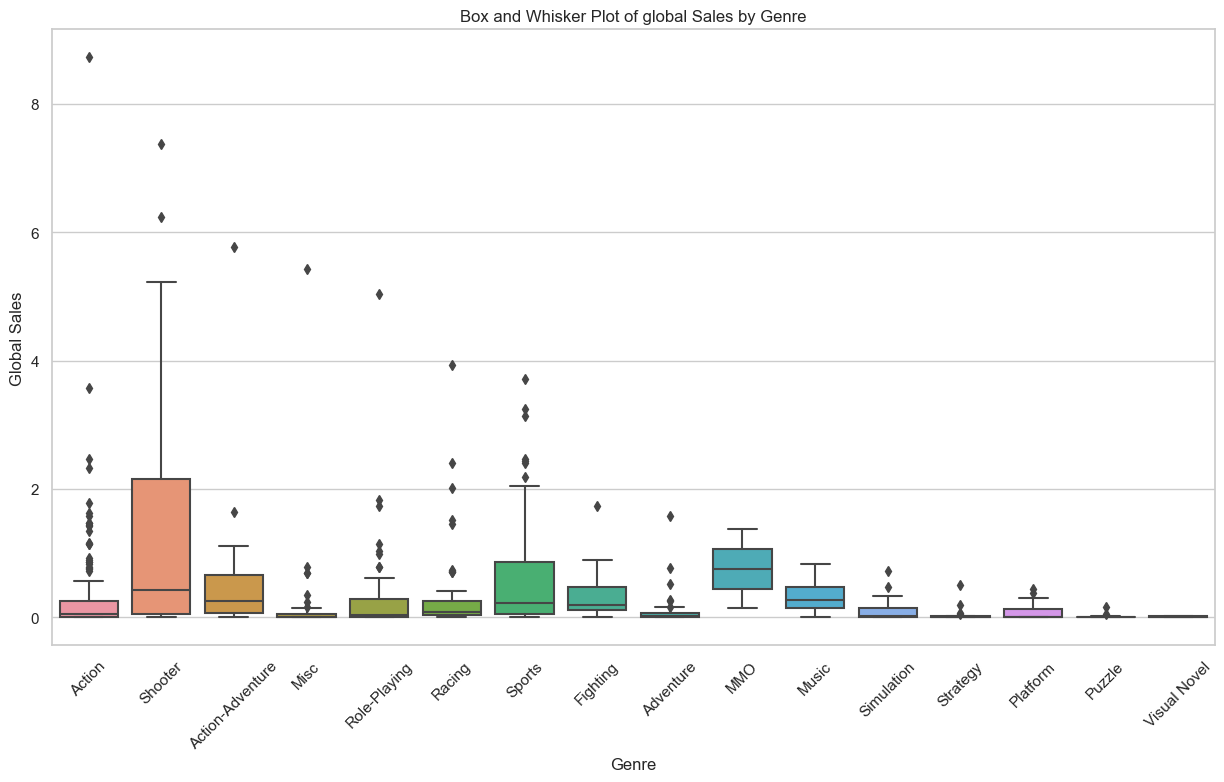

In [10]:
# Box and Whisker Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create a box and whisker plot for 'GlobaL' sales by genre
plt.figure(figsize=(15, 8))  # Set the size of the plot
sns.boxplot(x='Genre', y='Global', data=df.dropna(subset=['Genre', 'Global']))  # Create the box and whisker plot
plt.xlabel('Genre')  # Label for the x-axis
plt.ylabel('Global Sales')  # Label for the y-axis
plt.title('Box and Whisker Plot of global Sales by Genre')  # Title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()


C:\Users\Anjel69\AppData\Local\Temp\ipykernel_35784\1519905183.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr(method='pearson')


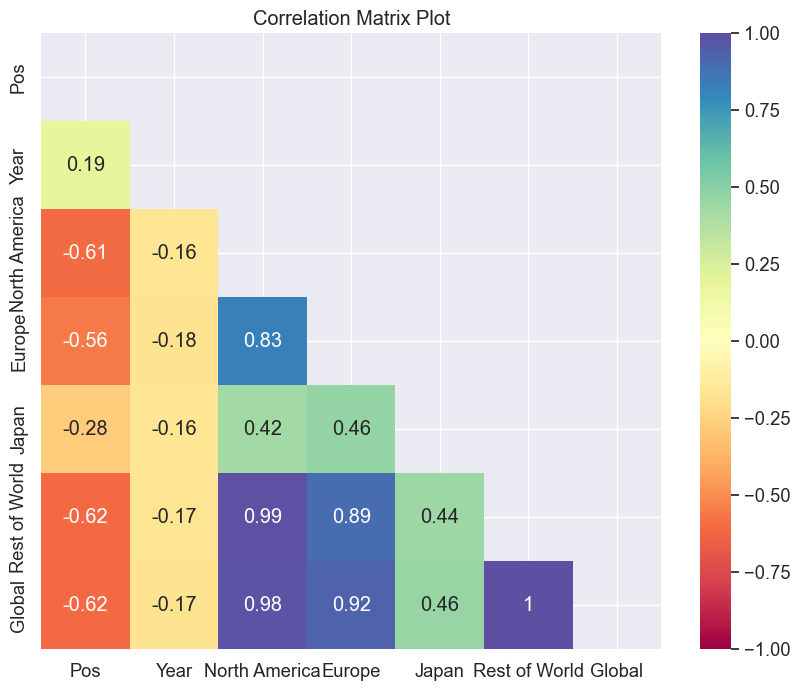

In [11]:
#Multivariate plots involve the simultaneous visualization of two or more variables to explore relationships, 
# correlations, and patterns among them.


#method: {‘pearson’, ‘kendall’, ‘spearman’}
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation matrix using the 'pearson' method
correlations = df.corr(method='pearson')

# Create a mask to hide the upper triangle of the correlation matrix
matrix = np.triu(correlations)

# Create a correlation matrix plot
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Set font scale for better readability
sns.heatmap(correlations, annot=True, vmin=-1, vmax=1, center=0, cmap='Spectral', mask=matrix)
plt.title('Correlation Matrix Plot')
plt.show()


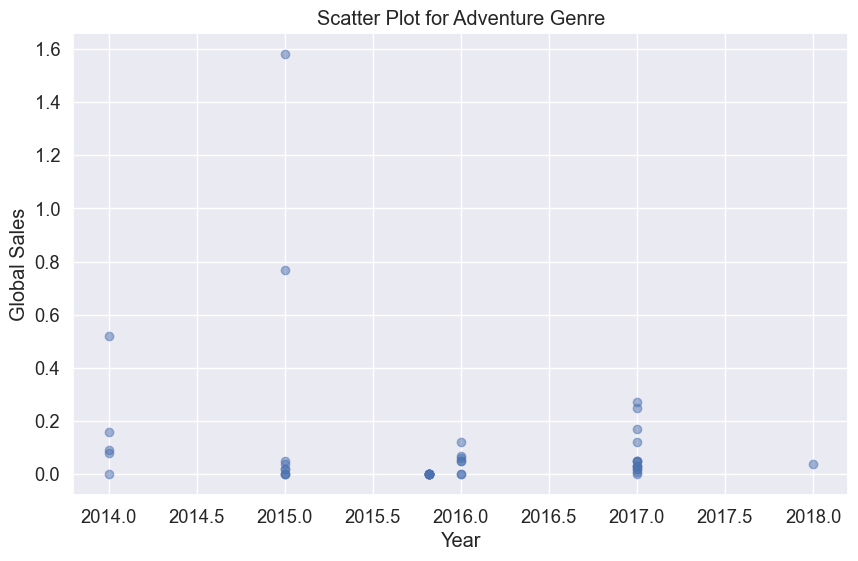

In [12]:
adventure_df = df[df['Genre'] == 'Adventure']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(adventure_df['Year'], adventure_df['Global'], alpha=0.5)
plt.title('Scatter Plot for Adventure Genre')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.grid(True)
plt.show()


In [13]:
# Export the DataFrame to a CSV file
df.to_csv('regression_engineered_data.csv', index=False)